In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("bank.csv")

In [3]:
print(df)

       age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
print(df['loan'])

0         no
1         no
2         no
3         no
4         no
        ... 
11157     no
11158     no
11159     no
11160    yes
11161     no
Name: loan, Length: 11162, dtype: object


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['loan'] = le.fit_transform(df['loan'])

In [9]:
print(df['loan'])

0        0
1        0
2        0
3        0
4        0
        ..
11157    0
11158    0
11159    0
11160    1
11161    0
Name: loan, Length: 11162, dtype: int64


In [10]:
X = df.drop('loan', axis = 1)
y = df['loan']

In [12]:
X_processed = pd.get_dummies(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state = 42)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ( RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier )

In [17]:
base_model = DecisionTreeClassifier()
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_base))

Decision Tree Accuracy: 0.7801164352888491


In [22]:
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42)
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bag))

Bagging Classifier Accuracy: 0.8741603224361845


In [23]:
ada_model = AdaBoostClassifier(
    estimator = DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=0.1,
    random_state=42
)
ada_model.fit(X_train,y_train)
y_pred_ada = ada_model.predict(X_test)
print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_ada))

AdaBoost Classifier Accuracy: 0.877742946708464


In [24]:
grad_model = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.1,
    random_state=42
)
grad_model.fit(X_train, y_train)
y_pred_grad = grad_model.predict(X_test)
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_grad))

Gradient Boosting Classifier Accuracy: 0.877295118674429


In [25]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("RF Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))

RF Classifier Accuracy: 0.8759516345723243


In [26]:
from sklearn.linear_model import LogisticRegression
estimators = [
    ('dt', DecisionTreeClassifier(max_depth=3)),
    ('rf', RandomForestClassifier(n_estimators=50)),
    ('ada', AdaBoostClassifier(n_estimators=50))
]

stack_model =StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    passthrough=True
)

stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))

Stacking Classifier Accuracy: 0.877742946708464


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.metrics import roc_auc_score, roc_curve 

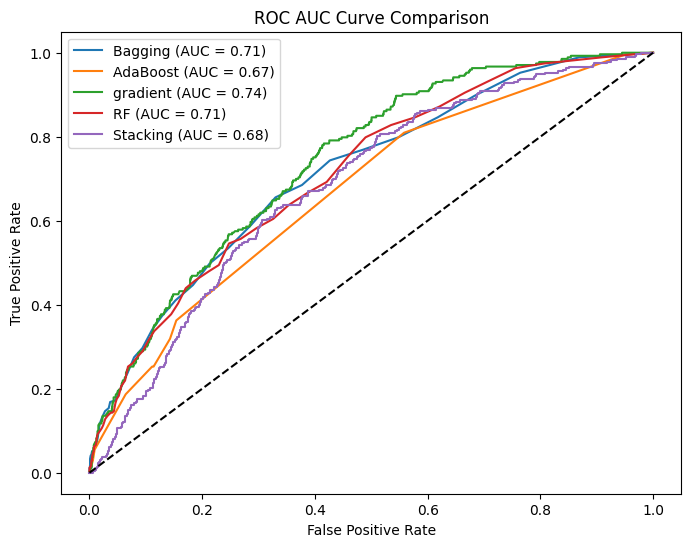

In [ ]:
plt.figure(figsize=(8,6))
models = {
    'Bagging' : bag_model,
    'AdaBoost' : ada_model,
    'gradient' : grad_model,
    'RF' : rf,
    'Stacking' : stack_model
}

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC AUC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
